# Chapter 1. Atlas Support

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libraries

To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.



In [ ]:
# Allen Human Brain Atlas Visualization in Jupyter Notebook

# Install necessary packages
!pip install plotly nilearn nibabel

ERROR: Operation cancelled by user


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shape: (448, 320, 628, 3)
Data ndim: 4
4D data detected. Using the first volume (0th index).


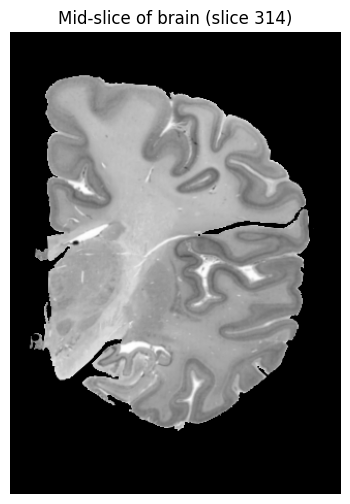

In [ ]:
# Allen Human Brain Visualization Notebook
# Works for 3D or 4D NIfTI files

# Install required packages (run only once in Colab)
!pip install nibabel nilearn plotly matplotlib

# Imports
import os
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Optional: Mount Google Drive if file is stored there
from google.colab import drive
drive.mount('/content/drive')

# ===========================
# Path to your NIfTI file
# Replace this with your actual path
nifti_file = '/content/drive/MyDrive/Consciousness_Is_Measurable/Allen/Dataset/NISSL_IMAGE_0.25.3D.0.25.nii'

# Check that file exists
if not os.path.exists(nifti_file):
    raise FileNotFoundError(f"File not found: {nifti_file}")

# Load NIfTI brain image
img = nib.load(nifti_file)
data = img.get_fdata()
print("Data shape:", data.shape)
print("Data ndim:", data.ndim)

# ===========================
# Handle 4D data (pick first volume if necessary)
if data.ndim == 4:
    print("4D data detected. Using the first volume (0th index).")
    data = data[:, :, :, 0]  # first volume

# ===========================
# 2D slice visualization
slice_index = data.shape[2] // 2  # middle slice
plt.figure(figsize=(6,6))
plt.imshow(data[:, :, slice_index], cmap='gray')
plt.title(f'Mid-slice of brain (slice {slice_index})')
plt.axis('off')
plt.show()

# ===========================
# Interactive 3D scatter visualization
# Only show non-zero voxels
x, y, z = data.nonzero()
intensity = data[x, y, z]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=1,
        color=intensity,
        colorscale='Viridis',
        opacity=0.5
    )
)])

fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
), title='Allen Human Brain 3D Visualization')

fig.show()


Right now you just show a single middle slice. You can:



*   Show multiple slices in a grid
*   Use better colormaps like hot, plasma, magma, or viridis
*   Overlay contours to highlight structures






In [ ]:
# Show multiple slices in a grid
import numpy as np

num_slices = 9
slice_indices = np.linspace(0, data.shape[2]-1, num_slices, dtype=int)

fig, axes = plt.subplots(3, 3, figsize=(12,12))
for ax, idx in zip(axes.flat, slice_indices):
    ax.imshow(data[:, :, idx], cmap='magma')
    ax.set_title(f'Slice {idx}')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Downsample for performance
step = 2  # take every 2nd voxel
x, y, z = np.nonzero(data[::step, ::step, ::step])
intensity = data[::step, ::step, ::step][x, y, z]

fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=intensity,
        colorscale='plasma',
        opacity=0.7,
        colorbar=dict(title='Intensity')
    )
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title='X', backgroundcolor="black"),
        yaxis=dict(title='Y', backgroundcolor="black"),
        zaxis=dict(title='Z', backgroundcolor="black"),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    title='Allen Human Brain 3D Visualization'
)
fig.show()


In [ ]:
from nilearn import datasets

# Load MNI152 template (for example)
mni = datasets.load_mni152_template()
plotting.plot_anat(mni, title='MNI152 Template', display_mode='ortho')

In [ ]:
import numpy as np

frames = []
for angle in np.linspace(0, 360, 36):
    camera = dict(eye=dict(x=2*np.sin(np.radians(angle)), y=2*np.cos(np.radians(angle)), z=1.5))
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

fig.frames = frames
fig.show()